#  EMF RBM Energy Densities

Look at different ways of computing the

- energy density
- free energy density
- entropy density

We can

- use the TAP S and MF Energy *U_naive   
    - which takes an equlibration step first  
    - S(mv, mh), U_naive(mv, mh)
- use a simple h = means_hiddens() step
    - S(v, h), E_MF(v, h)


In [1]:
import numpy as np
import h5py

import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn import linear_model, datasets, metrics, preprocessing 
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

import psutil

In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.utils.validation import assert_all_finite
from scipy.sparse import csc_matrix, csr_matrix, lil_matrix
from sklearn.preprocessing import Binarizer
np.seterr(all='warn')

{'divide': 'warn', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [3]:
import rbm_datasets

In [5]:
train_x, train_t, test_x, test_t  = rbm_datasets.

In [7]:
train_x.shape

(50000, 32, 32, 3)

In [6]:
from sklearn.preprocessing import binarize
X = binarize(train_x, threshold=0.01, copy=True)

ValueError: Found array with dim 4. Estimator expected <= 2.

### Helper methods for simple case

In [14]:
from sklearn.utils.fixes import expit    
from sklearn.utils.extmath import safe_sparse_dot

def sig_means(x, b, W):
    a = safe_sparse_dot(x, W.T) + b
    return expit(a, out=a)

### Baseline

In [15]:
import emf_rbm

In [16]:
psutil.swap_memory()

sswap(total=0, used=0, free=0, percent=0.0, sin=0, sout=0)

### mean Entropy, Energy, and Free Energy

In [17]:
rbm = emf_rbm.EMF_RBM(verbose=True, monitor=True)
rbm= rbm.fit(X)

[EMF_RBM] Iteration 1, pseudo-likelihood = -250.48, time = 9.95s
computing TAP Free Energies
monitor:  -314.171713225 417.643157365 103.479902116
[EMF_RBM] Iteration 2, pseudo-likelihood = -242.32, time = 24.28s
computing TAP Free Energies
monitor:  -311.883392684 415.497312213 103.670005269
[EMF_RBM] Iteration 3, pseudo-likelihood = -227.67, time = 24.57s
computing TAP Free Energies
monitor:  -301.33418311 393.456914109 92.8084122982
[EMF_RBM] Iteration 4, pseudo-likelihood = -216.42, time = 24.69s
computing TAP Free Energies
monitor:  -290.875488216 364.169795189 74.4673250356
[EMF_RBM] Iteration 5, pseudo-likelihood = -200.88, time = 24.54s
computing TAP Free Energies
monitor:  -284.760235952 344.120048601 61.2078356171
[EMF_RBM] Iteration 6, pseudo-likelihood = -194.78, time = 24.65s
computing TAP Free Energies
monitor:  -282.499515775 325.535774554 45.3502290321
[EMF_RBM] Iteration 7, pseudo-likelihood = -191.02, time = 24.49s
computing TAP Free Energies
monitor:  -280.215966561 3

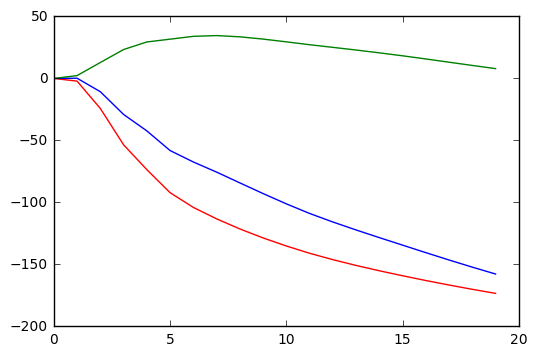

In [18]:
plt.plot(rbm.entropies-rbm.entropies[0], color='red')
plt.plot(rbm.mean_field_energies-rbm.mean_field_energies[0], color='blue')
plt.plot(rbm.free_energies-rbm.free_energies[0], color='green')